<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>PRODIGY INTERSHIP</b></u>
</div>

<div style="text-align: center; font-size: 35px; color: red;">
    <u><b>TASK 3: BUILD A DECISION TREE CLASSIFIER </b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>1. Build a Decision Tree Classifier to predict whether a customer will purchase a product based on demographic and behavioral data.</P>   
</div> 

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>LOADING LIBRARIES</b></u>
</div>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>LOADING DATASET</b></u>
</div>

In [14]:
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>DATA EXPLORATION</b></u>
</div>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [17]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## ENCODE CATEGORICAL VARIABLES

In [18]:
df_encoded = df.copy()
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

## FEATURE SELECTION & SPLITTING

In [19]:
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

## SPLIT DATA INTO TRAIN AND TEST

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## DECISION TREE MODEL IMPLEMENTATION

In [21]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## MODEL EVALUATION

In [22]:
y_pred = dtc.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 88.40%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.74      0.47      0.57       411

    accuracy                           0.88      2466
   macro avg       0.82      0.72      0.75      2466
weighted avg       0.87      0.88      0.87      2466



## DECISION TREE VISUALIZATION 

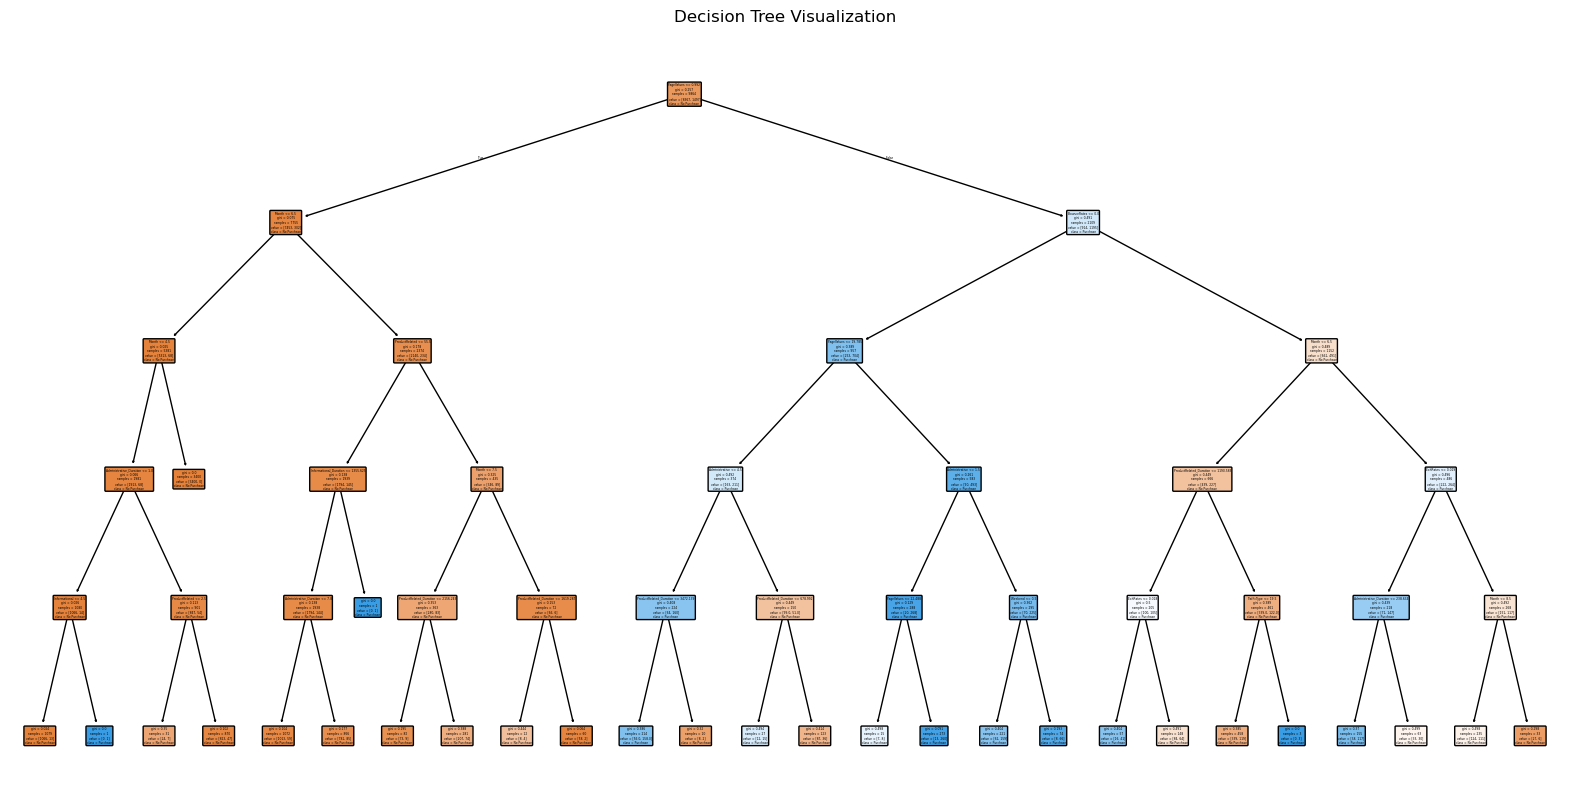

In [23]:
plt.figure(figsize=(20, 10))  # You can adjust the size
plot_tree(dtc, 
          feature_names=X.columns, 
          class_names=['No Purchase', 'Purchase'], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()